### **Purpose: **America's best player, Shane Van Boening, has been known to play poorly in the Mosconi Cup. He is also known for playing better on American soil as opposed to overseas. This analysis will dive deeper to see which factors are most important in predicting his success.

In [101]:
player = 'Shane Van Boening'
team = 'a'

In [102]:
import pickle
import pandas as pd

In [103]:
path = '//DREW/Users/andrew/Desktop/mosconi/'
dframe = pickle.load(open(path+'pkl/allyears_clean_locs','rb'))
if 'a' in team.lower():
    df = dframe[dframe['American_player'].str.contains(player)]
    df['Europe_lost'] = ~ df['Europe_won']
    df = df[['Format', 'European_player', 'European_score', 'American_score',
       'American_player', 'Europe_lost','Europe_won']]
    df.columns = ['Format', 'European_player', 'European_score', 'American_score',
       'American_player', 'America_won', 'America_lost']
else:
    df = dframe[dframe['European_player'].str.contains(player)]
    df['Europe_lost'] = ~ df['Europe_won']

c:\users\andrew\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [104]:
def stats(df):
    try:
        if 'a' in team.lower():
            win = df['America_won'].sum()
            loss = df['America_lost'].sum()
        else:
            win = df['Europe_won'].sum()
            loss = df['Europe_lost'].sum()
        mp= win+loss
        wl = 'Win-loss: {}-{}'.format(win,loss)
        pct = round(win/(win+loss)*100,0)
        return('Matches Played: {}'.format(mp),wl,'Pct: {}'.format(pct))
    except:
        return('No matches to display')

### Lets have a quick look at Shane's overall stats and check out his singles, doubles, and team stats.

In [105]:
sing = df[df['Format']=='Singles']
dub = df[df['Format']=='Doubles']
teams = df[df['Format']=='Teams']
triples = df[df['Format']=='Triples'] 

In [106]:
'Overall: {}'.format(stats(df))
'Singles: {}'.format(stats(sing))
'Doubles: {}'.format(stats(dub))
'Teams:   {}'.format(stats(teams))
'Triples: {}'.format(stats(triples))

"Overall: ('Matches Played: 60', 'Win-loss: 25-35', 'Pct: 42.0')"

"Singles: ('Matches Played: 25', 'Win-loss: 10-15', 'Pct: 40.0')"

"Doubles: ('Matches Played: 25', 'Win-loss: 11-14', 'Pct: 44.0')"

"Teams:   ('Matches Played: 10', 'Win-loss: 4-6', 'Pct: 40.0')"

'Triples: No matches to display'

### So he plays slightly better in doubles matches. Let's see if he plays better with certain partners 

In [107]:
dub = dub[['European_player','American_player','America_won','America_lost']]
dub['Partner']=dub['American_player'].str.replace('Shane Van Boening','')
dub['Partner']=dub['Partner'].str.replace('&','')
dub['Partner']=dub['Partner'].str.strip()

In [108]:
dub.groupby('Partner').sum()

,America_won,America_lost
Partner,,
Corey Deuel,1.0,2.0
Dennis Hatch,2.0,0.0
Earl Strickland,1.0,1.0
John Schmidt,0.0,1.0
Johnny Archer,4.0,1.0
Justin Bergman,0.0,1.0
Mike Dechaine,1.0,2.0
Rodney Morris,1.0,4.0
Skyler Woodward,1.0,1.0


### Looks like Shane plays best with Johnny (4-1) and Dennis (2-0) and plays poorly with Rodney (1-4)
### Let's check if he plays better against certain opponents

In [109]:
sing.groupby('European_player').sum()

,America_won,America_lost
European_player,,
Chris Melling,0.0,1.0
Darren Appleton,1.0,6.0
Daryl Peach,1.0,0.0
Karl Boyes,1.0,0.0
Konstantin Stepanov,1.0,0.0
Mika Immonen,1.0,2.0
Nick Ekonomopoulos,0.0,1.0
Nick van den Berg,3.0,0.0
Niels Feijen,0.0,1.0


## Apparently, Shane does really poorly against Darren Appleton (1-6) and does well against Nick Van Den Berg (3-0). 
## Lets see what Shane's record was for each year.

In [110]:
lst =df.index.values.tolist() 
years = set([])
for item in lst:
    years.add(item[0])
years=sorted(list(years))

In [111]:
years

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [112]:
yearly=[]
for year in years:
    win = df.loc[year]['America_won'].sum()
    loss = df.loc[year]['America_lost'].sum()
    yearly.append((win,loss))

In [113]:
yr= {}
for k,v in zip(years,yearly):
    yr[k]=v

In [114]:
yr

{2007: (4, 2),
 2008: (1, 5),
 2009: (4, 2),
 2010: (2, 4),
 2011: (3, 4),
 2012: (4, 2),
 2013: (2, 2),
 2014: (1, 6),
 2015: (4, 3),
 2016: (0, 5)}

In [115]:
win=[]
loss=[]
pct=[]
for w,l in yearly:
    win.append(w)
    loss.append(l)
    p=round((w*100/(w+l)),0)
    pct.append(p)

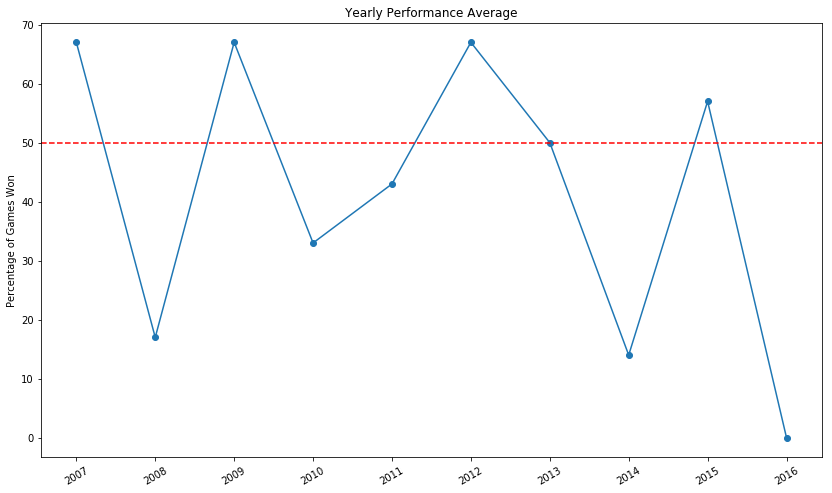

In [116]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ind = np.arange(len(years))  # the x locations for the groups

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)

ax.plot(pct,linestyle='-',marker='.',markersize=12)
ax.axhline(50, color='r',linestyle='--')

# add some;
ax.set_ylabel('Percentage of Games Won');
ax.set_title('Yearly Performance Average');
ax.set_xticks(ind);
ax.set_xticklabels( (years),rotation=30 );
# ax.legend( (rects1[0], rects2[0]), ('Wins', 'Losses') );

### Worst years: 2008 (1-5), 2014 (1-6) and 2016 (0-5)
All of which were 'away' games. Let's dig a bit deeper to see how big of a factor location is for Shane's performance.

## Shane is regarded as a formidable player on US soil, but is also known for underperforming overseas. Let's see if the location is a major factor in the quality of his performance.

## Played 10 years total: 5 home (all vegas), 5 away (4 england, 1 malta)

In [117]:
locs = pickle.load(open(path+'pkl/dloc','rb'))

In [118]:
hm=[]
aw=[]
for year in years:
    if 'USA' in locs[year]:
        hm.append(year)
    else:
        aw.append(year)

away= df.loc[aw]
home= df.loc[hm]

In [119]:
stats(home)

('Matches Played: 30', 'Win-loss: 17-13', 'Pct: 57.0')

In [120]:
stats(away)

('Matches Played: 30', 'Win-loss: 8-22', 'Pct: 27.0')

# 57% for home games vs 27% for away games is an *extremely* significant difference! 

### Let's drill down a bit further to parse out his singles and doubles matches for both home and away 

In [121]:
hsing = stats(home[home['Format']=='Singles'])

In [122]:
hdub = stats(home[home['Format']=='Doubles'])

In [123]:
asing = stats(away[away['Format']=='Singles'])

In [124]:
adub = stats(away[away['Format']=='Doubles'])

In [125]:
'Home Singles: {}'.format(hsing)
'Home Doubles: {}'.format(hdub)
'Away Singles: {}'.format(asing)
'Away Doubles: {}'.format(adub)

"Home Singles: ('Matches Played: 13', 'Win-loss: 7-6', 'Pct: 54.0')"

"Home Doubles: ('Matches Played: 12', 'Win-loss: 7-5', 'Pct: 58.0')"

"Away Singles: ('Matches Played: 12', 'Win-loss: 3-9', 'Pct: 25.0')"

"Away Doubles: ('Matches Played: 13', 'Win-loss: 4-9', 'Pct: 31.0')"

## Not much variation, but he does better in doubles in both cases.

In [127]:
def wincount(dframe=dframe,years=years):
    l=0
    w=0
    tie=0
    for year in years:
        f,t = dframe.loc[year]['Europe_won'].value_counts(sort=False)
        print(f,t)
        if f>t:
            l+=1
        elif f<t:
            w+=1
        else:
            tie+=1
    if 'a' in team.lower():
        w,l=l,w
    return 'win-loss-tie: {}-{}-{}'.format(w,l,tie)
wincount()

8 11
5 11
11 7
8 11
7 11
9 11
2 11
5 11
7 11
3 11


'win-loss-tie: 1-9-0'

### So America is only 1-9 with Shane on the team!

# Summary
- Shane plays far better at home than away! (57% vs 27%) 
- Plays slightly better in doubles, especially with Johnny Archer (4-1) or Dennis Hatch (2-0) 
- Plays bad in doubles with Rodney Morris (0-4)
- Does *really* bad against Darren Appleton (1-6) and does well against Nick van den Berg (3-0)
- America has a very poor record with Shane on the team! (1-9)